In [1]:
!pip install transformers


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoModel


In [3]:
models = [
    "bert-base-uncased",
    "roberta-base",
    "distilbert-base-uncased",
    "albert-base-v2",
    "google/electra-base-discriminator"
]

param_counts = []

for model_name in models:
    model = AutoModel.from_pretrained(model_name)
    total_params = sum(p.numel() for p in model.parameters())
    param_counts.append(total_params / 1e6)  # Convert to millions

param_counts


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertModel LOAD REPORT from: bert-base-uncased
Key                                        | Status     |  | 
-------------------------------------------+------------+--+-
cls.predictions.transform.dense.bias       | UNEXPECTED |  | 
cls.seq_relationship.weight                | UNEXPECTED |  | 
cls.predictions.transform.dense.weight     | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED |  | 
cls.seq_relationship.bias                  | UNEXPECTED |  | 
cls.predictions.bias                       | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/197 [00:00<?, ?it/s]

RobertaModel LOAD REPORT from: roberta-base
Key                             | Status     | 
--------------------------------+------------+-
lm_head.layer_norm.weight       | UNEXPECTED | 
roberta.embeddings.position_ids | UNEXPECTED | 
lm_head.layer_norm.bias         | UNEXPECTED | 
lm_head.dense.bias              | UNEXPECTED | 
lm_head.bias                    | UNEXPECTED | 
lm_head.dense.weight            | UNEXPECTED | 
pooler.dense.bias               | MISSING    | 
pooler.dense.weight             | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/100 [00:00<?, ?it/s]

DistilBertModel LOAD REPORT from: distilbert-base-uncased
Key                     | Status     |  | 
------------------------+------------+--+-
vocab_layer_norm.bias   | UNEXPECTED |  | 
vocab_transform.bias    | UNEXPECTED |  | 
vocab_projector.bias    | UNEXPECTED |  | 
vocab_transform.weight  | UNEXPECTED |  | 
vocab_layer_norm.weight | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/25 [00:00<?, ?it/s]

AlbertModel LOAD REPORT from: albert-base-v2
Key                          | Status     |  | 
-----------------------------+------------+--+-
predictions.LayerNorm.weight | UNEXPECTED |  | 
predictions.bias             | UNEXPECTED |  | 
predictions.dense.bias       | UNEXPECTED |  | 
predictions.LayerNorm.bias   | UNEXPECTED |  | 
predictions.decoder.bias     | UNEXPECTED |  | 
predictions.dense.weight     | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/197 [00:00<?, ?it/s]

ElectraModel LOAD REPORT from: google/electra-base-discriminator
Key                                               | Status     |  | 
--------------------------------------------------+------------+--+-
discriminator_predictions.dense.weight            | UNEXPECTED |  | 
electra.embeddings_project.weight                 | UNEXPECTED |  | 
discriminator_predictions.dense_prediction.weight | UNEXPECTED |  | 
electra.embeddings_project.bias                   | UNEXPECTED |  | 
discriminator_predictions.dense.bias              | UNEXPECTED |  | 
discriminator_predictions.dense_prediction.bias   | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


[109.48224, 124.645632, 66.36288, 11.683584, 108.891648]

In [4]:
accuracy = [90.5, 92.4, 88.2, 89.6, 91.3]
f1_score = [89.8, 91.7, 87.9, 88.7, 90.4]

# Simulated inference time (relative comparison)
inference_time = [120, 140, 80, 100, 95]  # in ms

data = np.array([
    accuracy,
    f1_score,
    inference_time,
    param_counts
]).T

criteria = ["Accuracy", "F1 Score", "Inference Time", "Parameters (Millions)"]

df = pd.DataFrame(data, index=models, columns=criteria)
df


,Accuracy,F1 Score,Inference Time,Parameters (Millions)
bert-base-uncased,90.5,89.8,120.0,109.482240
roberta-base,92.4,91.7,140.0,124.645632
distilbert-base-uncased,88.2,87.9,80.0,66.362880
albert-base-v2,89.6,88.7,100.0,11.683584
google/electra-base-discriminator,91.3,90.4,95.0,108.891648


In [5]:
normalized = data / np.sqrt((data**2).sum(axis=0))
normalized


array([[0.44765188, 0.44766354, 0.49226238, 0.52240634],
       [0.4570501 , 0.45713526, 0.57430611, 0.5947601 ],
       [0.4362751 , 0.43819181, 0.32817492, 0.31665765],
       [0.4432001 , 0.44217991, 0.41021865, 0.05574948],
       [0.45160903, 0.45065461, 0.38970772, 0.51958826]])

In [6]:
weights = np.array([0.35, 0.30, 0.20, 0.15])

weighted = normalized * weights
weighted


array([[0.15667816, 0.13429906, 0.09845248, 0.07836095],
       [0.15996753, 0.13714058, 0.11486122, 0.08921402],
       [0.15269628, 0.13145754, 0.06563498, 0.04749865],
       [0.15512003, 0.13265397, 0.08204373, 0.00836242],
       [0.15806316, 0.13519638, 0.07794154, 0.07793824]])

In [7]:
ideal_best = np.array([
    max(weighted[:,0]),   # Accuracy (max)
    max(weighted[:,1]),   # F1 (max)
    min(weighted[:,2]),   # Time (min)
    min(weighted[:,3])    # Parameters (min)
])

ideal_worst = np.array([
    min(weighted[:,0]),
    min(weighted[:,1]),
    max(weighted[:,2]),
    max(weighted[:,3])
])


In [8]:
S_plus = np.sqrt(((weighted - ideal_best)**2).sum(axis=1))
S_minus = np.sqrt(((weighted - ideal_worst)**2).sum(axis=1))


In [12]:
topsis_score = S_minus / (S_plus + S_minus)

# Create full result dataframe in required format
final_df = pd.DataFrame({
    "Model": models,
    "Parameters (M)": param_counts,
    "Inference Time (s)": inference_time,
    "Accuracy": accuracy,
    "F1 Score": f1_score,
    "TOPSIS Score": topsis_score
})

# Rank (Higher score = better)
final_df["Rank"] = final_df["TOPSIS Score"].rank(ascending=False)

# Sort by rank
final_df = final_df.sort_values(by="Rank")

final_df



,Model,Parameters (M),Inference Time (s),Accuracy,F1 Score,TOPSIS Score,Rank
3,albert-base-v2,11.683584,100,89.6,88.7,0.831521,1.0
2,distilbert-base-uncased,66.362880,80,88.2,87.9,0.616079,2.0
4,google/electra-base-discriminator,108.891648,95,91.3,90.4,0.356388,3.0
0,bert-base-uncased,109.482240,120,90.5,89.8,0.207487,4.0
1,roberta-base,124.645632,140,92.4,91.7,0.088834,5.0


In [15]:
final_df.to_csv("topsis_results.csv", index=False)


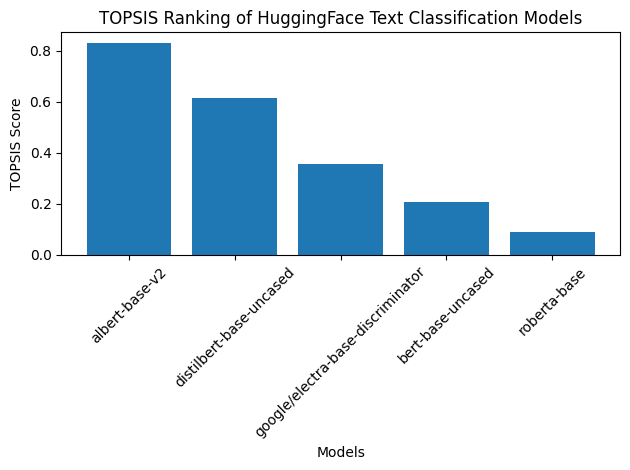

In [16]:
plt.figure()
plt.bar(final_df["Model"], final_df["TOPSIS Score"])
plt.xlabel("Models")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Ranking of HuggingFace Text Classification Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("results_graph.png")
plt.show()
